<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Reg_Simples_SKlearn_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
df_alunos = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Aprovacao_alunos.xlsx")
df_alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [44]:
df_alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [45]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [46]:
df_alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


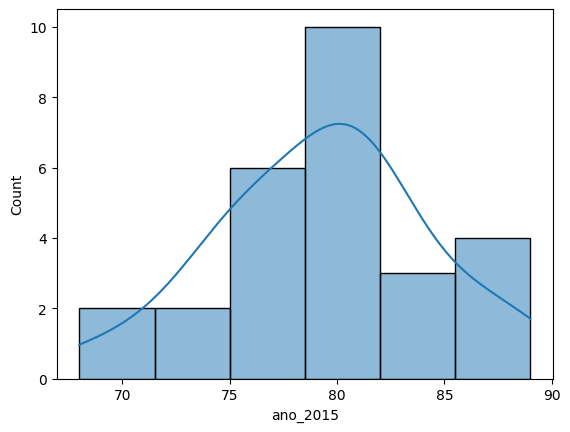

In [47]:
sns.histplot(data=df_alunos, x='ano_2015', kde=True);

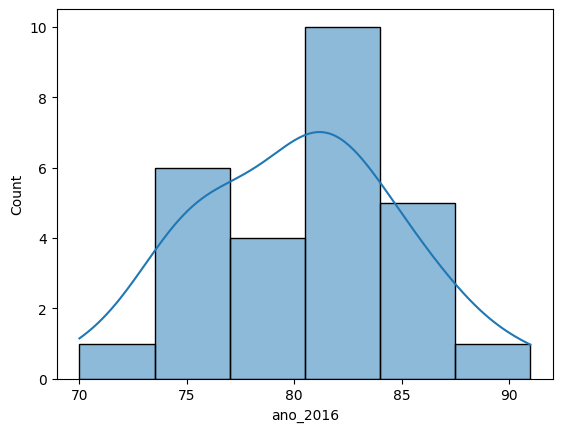

In [48]:
sns.histplot(data=df_alunos, x='ano_2016', kde=True);

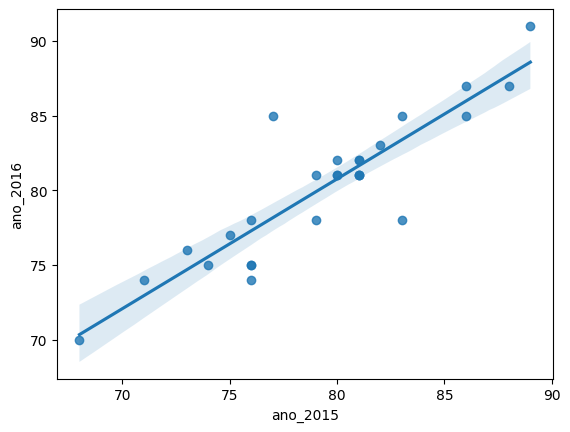

In [49]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            #ci = None,
            data = df_alunos);

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


alunos_norm = pd.DataFrame(scaler.fit_transform(df_alunos), index=df_alunos.index, columns=df_alunos.columns)

In [51]:
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [52]:
alunos_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


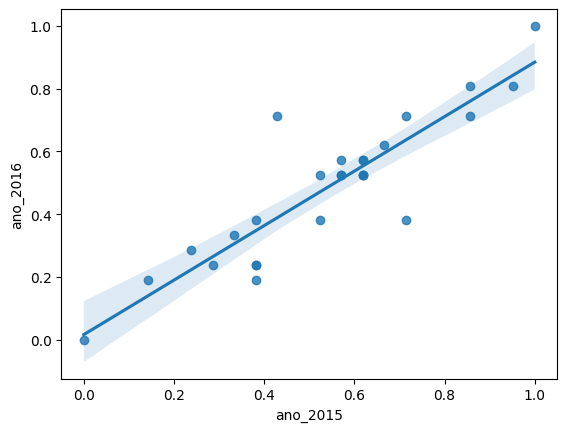

In [53]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            #ci = None,
            data = alunos_norm);

In [54]:
import statsmodels.formula.api as smf

In [55]:
#modelo MRLS
function = 'ano_2016~ano_2015'
model = smf.ols(formula=function, data=alunos_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.02e-10
Time:                        00:50:40   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [56]:
#modelo MRLS
function = 'ano_2016~ano_2015 -1'
model = smf.ols(formula=function, data=alunos_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    2.21e-20
Time:                        00:50:40   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Train e Test

In [57]:
x = alunos_norm[["ano_2015"]]

y = alunos_norm[["ano_2016"]]

In [58]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
r_sq = lr.score(x_train, y_train)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8800910056640281


In [60]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [61]:
y_pred_test = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.10156392395533688
MSE: 0.02234792217796548
RMSE: 0.14949221443929941
